### IMPORTING LIBRARIES 

In [1]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix

In [2]:
folder_list = os.listdir("20_newsgroups") # getting all folders
folder_list

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### STORING THE ELEMENTS 

In [3]:
X = [] # storing as filename , text 
Y = [] # storing the category of X 

for folder in folder_list:
    for doc in os.listdir("20_newsgroups/" + folder):
        # getting all data in each folder
        with open("20_newsgroups/" + folder + '/' + doc ,encoding="utf8",errors= "ignore") as f:
            # gathering and storing the data as desired 
            X.append((doc,f.read()))
            Y.append(folder)

X[1] , Y[1]




(('51060',
  'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51060 alt.atheism.moderated:727 news.answers:7300 alt.answers:155\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!agate!netsys!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Introduction to Atheism\nSummary: Please read this file before posting to alt.atheism\nKeywords: FAQ, atheism\nMessage-ID: <19930405122245@mantis.co.uk>\nDate: Mon, 5 Apr 1993 12:22:45 GMT\nExpires: Thu, 6 May 1993 12:22:45 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930308134439@mantis.co.uk>\nLines: 646\n\nArchive-name: atheism/introduction\nAlt-atheism-archive-name: introduction\nLast-modified: 5 April 1993\nVersion: 1.2\n\n-----BEGIN PGP SIGNED MESSAGE-----\n\n     

In [4]:
print(len(X) , len(Y))

19997 19997


### TRAINING TESTING SPLIT 

In [5]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size=0.25, random_state=0)

### STOPWORDS 

In [6]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together','too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

### BUILDING VOCABULARY USING WORDS IN DOCUMENTS

In [7]:
vocab = {} # dictionary

for i in range(len(X_train)):
    w_list = []  # re - initiate after every iteration
    
    for word in X_train[i][1].split():
        new_word = word.strip(string.punctuation).lower()
        if len(new_word) > 2 and new_word not in stopwords: # check condition
            # making the dictionary and updating corresponding count
            if new_word in vocab:
                vocab[new_word] += 1
            else:
                vocab[new_word] = 1  
    
    
    

In [8]:
vocab # printing the vocab dictionary

{'xref': 4566,
 'cantaloupe.srv.cs.cmu.edu': 4558,
 'talk.politics.guns:54393': 2,
 'talk.politics.misc:178727': 2,
 'soc.culture.jewish:63156': 2,
 'newsgroups': 15278,
 'talk.politics.guns,talk.politics.misc,soc.culture.jewish': 13,
 'path': 15246,
 'cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!bogus.sura.net!darwin.sura.net!sgiblab!wetware!spunky.redbrick.com!psinntp!psinntp!bony1!billg': 2,
 'billg@bony1.bony.com': 10,
 'gripp': 10,
 'subject': 16224,
 "who's": 355,
 'mormons': 364,
 'jews': 1221,
 'message-id': 15051,
 'c5ski7.df4@bony1.bony.com': 6,
 'organization': 14770,
 'la&w': 3,
 'references': 9745,
 '1qvfik$6rf@usenet.ins.cwru.edu': 89,
 '1993apr20.003522.22480@midway.uchicago.edu': 20,
 '1993apr20.054839.14002@ucsu.colorado.edu': 14,
 '1r1118$4vs@terminator.rs.itd.umich.edu': 11,
 'date': 15558,
 'tue': 1721,
 'apr': 14784,
 '1993': 11104,
 '16:58:55': 3,
 'gmt': 13305,
 'lines': 15659,
 'article': 9419,
 'jlove@ivrit.ra.itd.umich.edu

### PLOTTING GRAPH TO GET CUTOFF FREQUENCY

In [9]:
# number of words for that particular freq 

num_word = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range((max(vocab.values())+1))]

for key in vocab:
    num_word[vocab[key]] += 1 
    
num_word[:10] , freq[:10]


([0, 134443, 31447, 13234, 8139, 5085, 3888, 2744, 2158, 1719],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

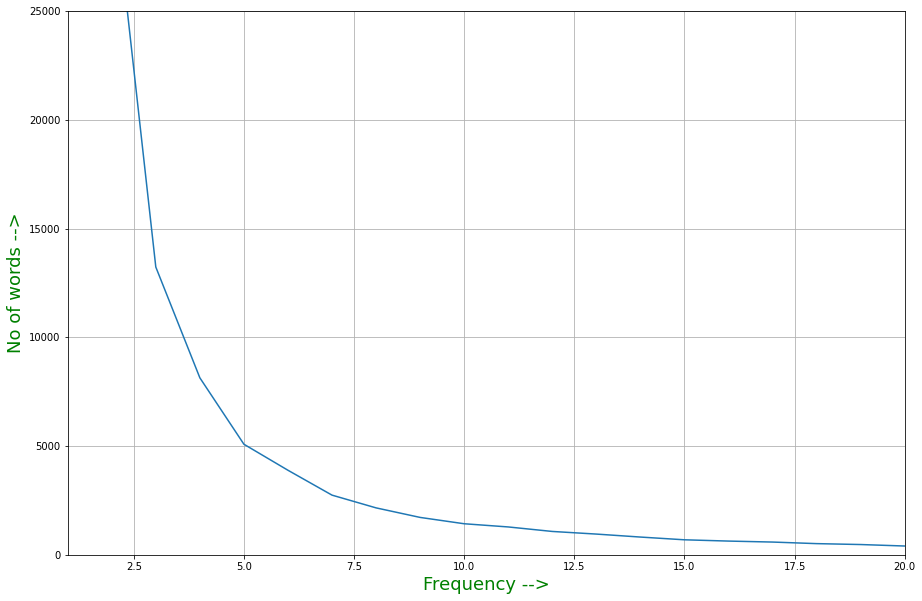

In [10]:
# PLOTTING GRAPH FOR CUTOFF FREQ

plt.figure( figsize =(15,10) )
plt.grid()
plt.plot(freq,num_word)
plt.axis([1, 20, 0, 25000])
plt.xlabel("Frequency -->",  size = 18 , color = 'green' )
plt.ylabel("No of words -->",  size = 18 , color = 'green')

plt.show()


In [11]:
# Deciding cutoff frequency to be 40
freq_cutoff = 40 

words_above_cutoff = len(vocab) - sum(num_word[:freq_cutoff]) # calc words above cutoff frequency

print("Words above the cutoff frequency : " , words_above_cutoff)



Words above the cutoff frequency :  7058


### CHOOSING  FEATURES WITH WORDS HIGHER THAN CUTOFF FREQUENCY

In [12]:
features = []  # features list

for keys in vocab:
    if vocab[keys] >= freq_cutoff: # check condition
        features.append(keys) # getting the desired features



In [13]:
features[:5]

['xref', 'cantaloupe.srv.cs.cmu.edu', 'newsgroups', 'path', 'subject']

### FUNCTION TO REPRESENT DATA AS WORD VECTOR COUNT 

In [14]:
# this takes some time to finish the process
# converts the data into tabular format for better analysis

# word vector count done for training data and test data 
def vector_count(df , features):
    dataset = np.zeros((len(df) , len(features))) # table form of 0 as initial value
    for i in range(len(df)):
        # getting the word list 
        word_list = [ word.strip(string.punctuation).lower() for word in df[i][1].split() ]
        for word in word_list:
            if word in features: # check condition 
                dataset[i][features.index(word)] += 1 # increasing the frequency
    return dataset
    

In [15]:
# ------------------------------
# TAKES LOTS OF TIME TO COMPLETE
# ------------------------------

# calling vector_count func on X_train and X_test

X_train_dataset = vector_count(X_train , features) 
X_test_dataset = vector_count(X_test , features)


In [16]:
print(type(X_train_dataset) , X_train_dataset[1])

<class 'numpy.ndarray'> [0. 0. 1. ... 0. 0. 0.]


### SKLEARN's MULTINOMIAL NAIVE BAYES 

In [17]:
# ------------------------------
# TAKES LOTS OF TIME TO COMPLETE
# ------------------------------

clf = MultinomialNB() # classsifer 
clf.fit(X_train_dataset , Y_train) 
Y_test_pred = clf.predict(X_test_dataset)  # prediction on test data

sklearn_score_train_dataset = clf.score(X_train_dataset , Y_train)  # training score
sklearn_score_test_dataset = clf.score(X_test_dataset , Y_test) # testing score
 
print("Sklearn Score on Training Data : " ,sklearn_score_train_dataset ) 
print("Sklearn Score on Testing Data : " ,sklearn_score_test_dataset )

print("--------------------------")
print("CLASSIFICATION REPORT :-") 
print("--------------------------")
print(classification_report(Y_test , Y_test_pred)) # classification report 




Sklearn Score on Training Data :  0.9221177568847103
Sklearn Score on Testing Data :  0.8764
--------------------------
CLASSIFICATION REPORT :-
--------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.76      0.82      0.79       233
           comp.graphics       0.79      0.84      0.81       253
 comp.os.ms-windows.misc       0.83      0.84      0.83       249
comp.sys.ibm.pc.hardware       0.82      0.87      0.84       240
   comp.sys.mac.hardware       0.88      0.94      0.91       236
          comp.windows.x       0.92      0.86      0.89       240
            misc.forsale       0.83      0.84      0.83       261
               rec.autos       0.92      0.94      0.93       269
         rec.motorcycles       0.94      0.97      0.95       284
      rec.sport.baseball       0.99      0.96      0.98       248
        rec.sport.hockey       0.97      0.98      0.97       231
               sci.crypt       0.96

# CONFUSION MATRIX OF SKLEARN MULTINOMIALNB

In [18]:
print(confusion_matrix(Y_test , Y_test_pred))

[[190   1   0   0   0   0   0   0   3   0   0   0   0   1   0   1   1   1
    4  31]
 [  0 213  19   6   5   3   2   0   0   0   0   0   2   3   0   0   0   0
    0   0]
 [  0  12 208  12   2  10   2   0   0   0   0   0   1   0   2   0   0   0
    0   0]
 [  0   2   7 209   8   0   8   3   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   2   6 221   0   3   0   1   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  16   6   2   2 207   3   0   0   0   0   1   2   0   0   0   0   0
    1   0]
 [  0   2   1   9   3   0 220   7   2   0   1   1   9   0   3   0   1   0
    2   0]
 [  0   0   0   0   1   1   8 254   3   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   0   0   1   0   4   1 276   0   0   0   0   0   0   0   0   0
    1   0]
 [  0   1   0   0   0   0   3   3   1 239   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   1   0   0   0   0   0   0   0 227   0   1   0   0   0   0   0
    2   0]
 [  0   4   3   0   2   3   0   0   1   0   0 212   0   1   0   0

# IMPLEMENTING MULTINOMIAL NAIVE BAYES FROM SCRATCH

In [19]:
# writing all functions in 'MultiNomialNaiveBayes' class 

class MultiNomialNaiveBayes:
    
    def __init__(self):        
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category
        self.count = {}          
        self.classes = None # different news categories
        
    
    
    # -------------
    # FIT FUNCTION 
    # -------------
    def fit(self , X_train , Y_train):
        self.classes = set(Y_train) # distinct values of categories 
        
        # iterating over all classes
        for curr_class in self.classes:
            self.count[curr_class] = {} # result 
            
            for i in range(len(X_train[0])):
                self.count[curr_class][i] = 0
            
            self.count[curr_class]['total'] = 0 
            self.count[curr_class]['total_points'] = 0 
        
        # storing total count of training data belonging to current class
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j] += X_train[i][j]
                self.count[Y_train[i]]['total'] += X_train[i][j] # getting and updating respective count 
            
            self.count[Y_train[i]]['total_points'] += 1  # incrementing total points 
            
        
    
    # ---------------------------------
    # CALCULATING PROBABILITY USING LOG
    # ---------------------------------
    def log_probability(self , test_point , curr_class):
        log_prob = np.log(self.count[curr_class]['total_points']) 
        - np.log(self.count['total_points']) # final prob 
        
        total_word = len(test_point) 
        
        for i in range(len(test_point)):
            # calculating prob of current word
            current_word_prob = test_point[i]*(np.log(self.count[curr_class][i] + 1)-
                                               np.log(self.count[curr_class]['total'] + 
                                                      total_word))
            # updating the prob by adding 
            log_prob += current_word_prob
        
        return log_prob
        
        
        
    # ------------------------------------
    # HELPER FUNCTION FOR PREDICT FUNCTION
    # ------------------------------------
    def predictSinglePoint(self,test_point): 
        # initializing variables and their values
        best_class = None
        best_prob = None
        first_run = True
        
        # iterating over all classes
        for curr_class in self.classes:
            # calculating prob of that class
            log_probability_current_class = self.log_probability(test_point , curr_class)
            if (first_run) or (log_probability_current_class > best_prob) : # check condition
                
                # updating the variables and their values
                best_class = curr_class
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
    
      
        
    # ----------------
    # PREDICT FUNCTION
    # ----------------
    def predict(self , X_test):
        
        Y_pred = [] # list for final prediction
        for i in range(len(X_test)):        
            Y_pred.append( self.predictSinglePoint(X_test[i]) ) # getting the values by calling helper function
        
        return Y_pred
    
    
    
    # --------------
    # SCORE FUNCTION
    # --------------
    def score(self,Y_pred,Y_true):
        # functions returns the mean accuracy
        
        cnt = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]: # check condition for scoring
                cnt += 1 # incrementing count 
        return cnt / len(Y_pred) # gives the score
        

In [20]:
# ------------------------------
# TAKES LOTS OF TIME TO COMPLETE
# ------------------------------

our_clf = MultiNomialNaiveBayes() # classifier 
our_clf.fit(X_train_dataset , Y_train) 
Y_test_pred = our_clf.predict(X_test_dataset)  # predictions

Our_score_test_dataset = our_clf.score(Y_test_pred , Y_test)  # testing score
 
print("Our Score on Testing Data : " ,Our_score_test_dataset )

print("--------------------------")
print("CLASSIFICATION REPORT :-") 
print("--------------------------")
print(classification_report(Y_test , Y_test_pred)) # classification report

Our Score on Testing Data :  0.8764
--------------------------
CLASSIFICATION REPORT :-
--------------------------
                          precision    recall  f1-score   support

             alt.atheism       0.76      0.82      0.79       233
           comp.graphics       0.79      0.84      0.81       253
 comp.os.ms-windows.misc       0.83      0.84      0.83       249
comp.sys.ibm.pc.hardware       0.82      0.87      0.84       240
   comp.sys.mac.hardware       0.88      0.94      0.91       236
          comp.windows.x       0.92      0.86      0.89       240
            misc.forsale       0.83      0.84      0.83       261
               rec.autos       0.92      0.94      0.93       269
         rec.motorcycles       0.94      0.97      0.95       284
      rec.sport.baseball       0.99      0.96      0.98       248
        rec.sport.hockey       0.97      0.98      0.97       231
               sci.crypt       0.96      0.91      0.94       233
         sci.electronics  

# CONFUSION MATRIX OF MY IMPLEMENTATION OF MULTINOMIALNB

In [21]:
print(confusion_matrix(Y_test , Y_test_pred))

[[190   1   0   0   0   0   0   0   3   0   0   0   0   1   0   1   1   1
    4  31]
 [  0 213  19   6   5   3   2   0   0   0   0   0   2   3   0   0   0   0
    0   0]
 [  0  12 208  12   2  10   2   0   0   0   0   0   1   0   2   0   0   0
    0   0]
 [  0   2   7 209   8   0   8   3   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   2   6 221   0   3   0   1   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  16   6   2   2 207   3   0   0   0   0   1   2   0   0   0   0   0
    1   0]
 [  0   2   1   9   3   0 220   7   2   0   1   1   9   0   3   0   1   0
    2   0]
 [  0   0   0   0   1   1   8 254   3   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   0   0   1   0   4   1 276   0   0   0   0   0   0   0   0   0
    1   0]
 [  0   1   0   0   0   0   3   3   1 239   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   1   0   0   0   0   0   0   0 227   0   1   0   0   0   0   0
    2   0]
 [  0   4   3   0   2   3   0   0   1   0   0 212   0   1   0   0

# COMPARING THE SCORE OF BOTH SKLEARN AND OUR IMPLEMENTATION OF MULTINOMIAL NAIVE BAYES

In [22]:
print("Score of ' OUR IMPLEMENTATION of MultinomialNB ' on test data :",Our_score_test_dataset)
print("Score of ' INBUILT SKLEARN IMPLEMENTATION of MultinomialNB ' on the same test data :",sklearn_score_test_dataset)

Score of ' OUR IMPLEMENTATION of MultinomialNB ' on test data : 0.8764
Score of ' INBUILT SKLEARN IMPLEMENTATION of MultinomialNB ' on the same test data : 0.8764


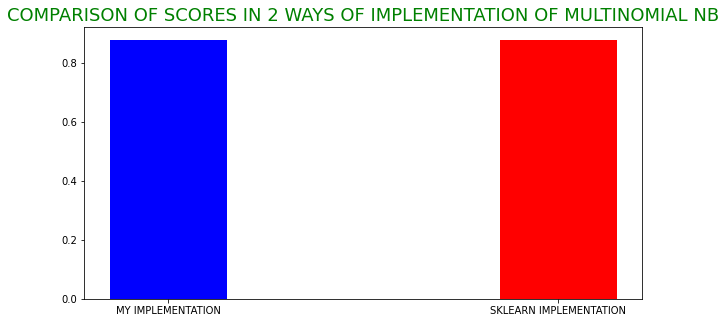

In [35]:
scores = [Our_score_test_dataset , sklearn_score_test_dataset]
x_axis = [0,1]
plt.figure( figsize =(10,5) )
plt.bar(['MY IMPLEMENTATION','SKLEARN IMPLEMENTATION'] ,  scores , width = 0.3 , color = ['blue','red'])
plt.title("COMPARISON OF SCORES IN 2 WAYS OF IMPLEMENTATION OF MULTINOMIAL NB" ,  size = 18 , color = 'green')

plt.show()